In [1]:
import matplotlib
import torch
import torch.nn.functional as F
from torchdiffeq import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
from IPython.display import clear_output
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm

In [2]:
def lorenz(t, X):
    sigma = 10.
    beta = 8/3
    rho = 28.
    if X.ndim == 1:
        x, y, z = X
    else:
        x, y, z = X.unbind(dim=-1)
    xdot = sigma * (y - x)
    ydot = x * (rho - z) - y
    zdot = x * y - beta * z
    return torch.stack([xdot, ydot, zdot], dim=-1)

In [7]:
x_0 = torch.tensor([1., 0., 0.])

# Define the time values
t = torch.linspace(0., 450., 1000)

# Using ODE Solver to Integrate the function to get the data
true_lorenz = odeint(lorenz, x_0, t)

In [20]:
true_lorenz

tensor([[  1.0000,   0.0000,   0.0000],
        [ 14.4937,  -1.0928,  46.3496],
        [ -9.1484,  -9.9365,  27.0029],
        ...,
        [ -1.3973,  -1.0772,  19.2976],
        [-15.5357, -16.9777,  35.2201],
        [  2.2215,   3.7236,  14.8527]])

In [21]:
X0 = true_lorenz[-1]
epsilon=torch.tensor(1.e-6)
X1 = X0 + epsilon*np.random.rand(3)
delta_0 = torch.sqrt(torch.sum((X1-X0)**2))

In [22]:
X0,X1,delta_0

(tensor([ 2.2215,  3.7236, 14.8527]),
 tensor([ 2.2215,  3.7236, 14.8527], dtype=torch.float64),
 tensor(9.7431e-07, dtype=torch.float64))

In [24]:

state0 = lorenz(t,X0)
state1 = lorenz(t,X1)

In [27]:
state0.shape,state1.shape

(torch.Size([3]), torch.Size([3]))

In [30]:
state0,state1

(tensor([ 15.0209,  25.4834, -31.3352]),
 tensor([ 15.0209,  25.4834, -31.3352], dtype=torch.float64))

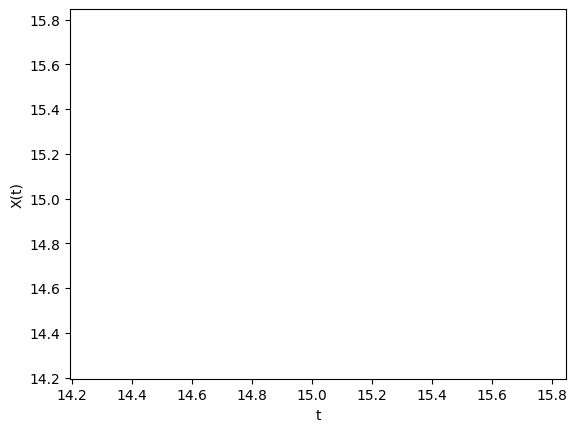

In [35]:


# Now run both initial conditions


# Compare the two trajectories as time-series X
plt.figure()
ax = plt.subplot(111)
ax.plot(state0[0],state1[0])
plt.xlabel('t')
plt.ylabel('X(t)')
plt.show()

In [2]:
input_signals_np = np.load('Data\InputSignals_RefData10_50.npy')
output_signals_np = np.load('Data\OutputSignals_RefData10_50.npy')
s_saturation_np = np.load('Data\S_saturation_sr20_Hrange10_50.npy')
x_saturated_np = np.load('Data\X_saturation_sr20_Hrange10_50.npy')

In [39]:
input_signals = torch.tensor(input_signals_np, dtype=torch.float64)
output_signals = torch.tensor(output_signals_np, dtype=torch.float64)
s_saturation = torch.tensor(s_saturation_np, dtype=torch.float64)
x_saturated = torch.tensor(x_saturated_np, dtype=torch.float64)

In [40]:
input_signals_np.shape, output_signals_np.shape, s_saturation_np.shape, x_saturated_np.shape

((5000, 11), (5000, 700), (5000, 9, 219), (5000, 6, 219))

In [57]:
class RingsTrain(nn.Module):
    """
    neural network for learning the chaotic lorenz system
    """
    def __init__(self):
        super(RingsTrain, self).__init__()
        self.lin = nn.Linear(9, 256)
        self.lin3 = nn.Linear(256, 9)
        self.relu = nn.ReLU()

    def forward(self, t, x):
        x = self.relu(self.lin(x))
        x = self.lin3(x)
        return x
     

In [42]:
s_saturation.shape, x_saturated.shape

(torch.Size([5000, 9, 219]), torch.Size([5000, 6, 219]))

In [44]:
time_intervals = torch.linspace(0, 240., 20)

(0.0, 220.0)

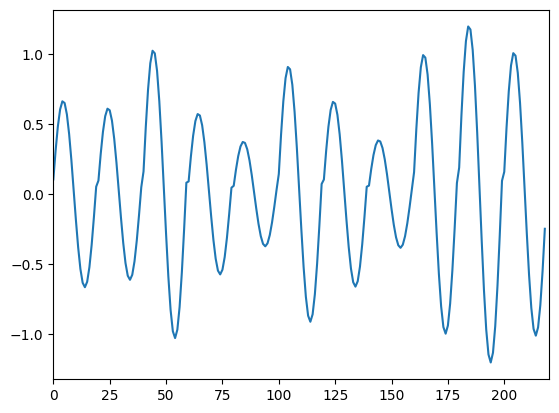

In [45]:
plt.plot(s_saturation[1][1], label='Saturation')
plt.xlim(0, 220)

In [89]:
s_saturation.shape

torch.Size([5000, 9, 219])

In [295]:
def get_batch(true_y,outs, batch_size):
    random_index = random.randint(0, 220 - 1)
    #print(random_index)
    batch_y0 = true_y[0]  # (batch_size, D)
    batch_t =  t[:batch_size] # (batch_size)
    batch_y = outs[:]  # (batch_size, M, D)
    #batch_y = batch_y[:,:,3:,:]
    return batch_y0,batch_y

In [176]:
import random
random.seed(42)

# Total number of indices
total_indices = 5000

# Generate a random index


Random Index: 912


In [191]:
random_index = random.randint(0, total_indices - 1)

print("Random Index:", random_index)

Random Index: 1905


In [192]:
train.shape

torch.Size([1000, 219, 9])

In [293]:
random_index = random.randint(0, 1000 - 1)


In [296]:
batch_y0, batch_y = get_batch(train[random_index],outs[random_index], 1)

In [211]:
train[random_index].shape

torch.Size([219, 9])

In [297]:
batch_y0.shape,batch_y.shape

(torch.Size([9]), torch.Size([219, 6]))

In [298]:
batch_y

tensor([[ 0.0307, -0.1724, -0.3650, -0.4700, -0.4186, -0.1362],
        [ 0.4518,  0.0307, -0.1724, -0.3650, -0.4700, -0.4186],
        [ 0.8232,  0.4518,  0.0307, -0.1724, -0.3650, -0.4700],
        ...,
        [ 0.3003,  0.2940,  0.2331,  0.2723,  0.2753,  0.2782],
        [ 0.2454,  0.3003,  0.2940,  0.2331,  0.2723,  0.2753],
        [ 0.1359,  0.1389,  0.2454,  0.3003,  0.2940,  0.2331]])

In [286]:
train.shape

torch.Size([1000, 219, 9])

In [285]:
x_saturated.shape

torch.Size([5000, 6, 219])

In [289]:
outs = x_saturated[:1000].transpose(1,2)

In [290]:
outs.shape

torch.Size([1000, 219, 6])

In [299]:
pred_y = odeint(model, batch_y0, t)

In [301]:
pred_y[:,3:].shape

torch.Size([219, 6])

In [306]:
for i in range(1000):
    optimizer.zero_grad()
    random_index = random.randint(0, 1000 - 1)
    batch_y0, batch_y = get_batch(train[random_index],outs[random_index], 20)
    
    pred_y = odeint(model, batch_y0, t)
    loss = F.mse_loss(pred_y[:,3:], batch_y)
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        # pred_y = odeint(model, train[random_index][0], t)
        # loss = F.mse_loss(pred_y, outs[random_index])
        print('Iter {:04d} | Total Loss {:.6f}'.format(i, loss.item()))

Iter 0000 | Total Loss 5931139483045826397120808512390029096801576491258783038879592783806464.000000
Iter 0100 | Total Loss 5912397811005741346971927157050091138608890336924026142334544401924096.000000
Iter 0200 | Total Loss 6167139839005645529382880271330925057956766200929471817151222827188224.000000
Iter 0300 | Total Loss 6367957837320014958066618596885335005570884505030906536270000044376064.000000
Iter 0400 | Total Loss 6091435332392500363268706844740198688751194182608043021142887587905536.000000
Iter 0500 | Total Loss 5541048017835043903172441727265022465171962475959715486392823723327488.000000
Iter 0600 | Total Loss 5648205700889806936231136709280697031927677540302524627397294279360512.000000
Iter 0700 | Total Loss 5913979951153170607801558088413163291462143381147548657721615736373248.000000
Iter 0800 | Total Loss 5456582867178676150973678815133560082068057411241516744708699700854784.000000
Iter 0900 | Total Loss 62955702764365376039931242702775331727864404273386727282806215325777

In [307]:
with torch.no_grad():
    pred = odeint(model, train[random_index][0], t)

In [308]:
pred.shape

torch.Size([219, 9])

In [315]:
train[random_index][0]

tensor([ 0.0000,  0.1541,  0.3044, -0.3987, -0.5819, -0.6804, -0.5954, -0.2790,
         0.1684])

In [309]:
train[random_index].shape

torch.Size([219, 9])

In [310]:
a = pred[:,1]

In [311]:
b = outs[random_index][:,1]

In [312]:
a[:10],b[:10]

(tensor([  0.1541,  -0.8774,  -1.7827,  -2.9231,  -4.4877,  -6.6890,  -9.7870,
         -14.1798, -20.4960, -29.6573]),
 tensor([-0.3987, -0.1963,  0.1921,  0.5116,  0.5917,  0.5211,  0.3825,  0.0951,
         -0.2192, -0.3336]))

In [235]:
x,y = get_batch(train[random_index],200)

71


In [283]:
x

tensor([ 0.0000,  0.0499,  0.0986, -0.2571, -0.4239, -0.5196, -0.4408, -0.1500,
         0.2942])

In [237]:
y.shape

torch.Size([219, 9])

In [171]:
train.shape

torch.Size([1000, 219, 9])

In [15]:
t = torch.linspace(0, 219, 219)

In [303]:
model = RingsTrain()

In [304]:
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [163]:
batch_y0,batch_y = get_batch(train, 1)

[786]


In [169]:
batch_y0.shape

torch.Size([1, 219, 9])

In [164]:
batch_y0[:,0].shape

torch.Size([1, 9])

In [167]:
v = s_saturation[786].transpose(0,1)
v.shape

torch.Size([219, 9])

In [170]:
batch_y0.shape

torch.Size([1, 219, 9])

In [168]:
v[0]

tensor([ 0.0000,  0.0694,  0.1371, -0.0847, -0.2265, -0.4039, -0.4097, -0.0746,
         0.4425])

In [150]:
truth.shape

torch.Size([5000, 219, 9])

In [244]:
pred_y = odeint(model, train[random_index][0],t)

In [245]:
pred_y.shape

torch.Size([219, 9])

In [165]:
batch_y0[:,0][0,:]

tensor([ 0.0000,  0.0694,  0.1371, -0.0847, -0.2265, -0.4039, -0.4097, -0.0746,
         0.4425])

In [127]:
train = s_saturation[:1000].transpose(1,2)

In [128]:
train.shape

torch.Size([1000, 219, 9])

In [19]:
batch_y0 = batch_y0.transpose(1,2)

In [133]:
batch_y0.shape,batch_y.shape

(torch.Size([10, 219, 9]), torch.Size([10, 10, 219, 9]))

In [75]:
batch_y0.shape,batch_t.shape,batch_y.shape

(torch.Size([10, 9, 219]), torch.Size([10]), torch.Size([10, 10, 9, 219]))

In [32]:
batch_y0 = batch_y0.transpose(1,2)

In [70]:
batch_y0.shape

torch.Size([10, 219, 9])

In [26]:
batch_y0[0][:][4]

tensor([ 0.7629,  0.7858,  0.7894,  0.7792,  0.7022,  0.3409, -0.0831, -0.2754,
        -0.4101])

In [56]:
torch.set_default_dtype(torch.float64)

In [60]:
m = model(batch_t,batch_y0[0][2][:9])

In [61]:
m.shape

torch.Size([9])

In [87]:
pred_y = odeint(model, truth[0],t)

In [88]:
pred_y.shape

torch.Size([219, 219, 9])

torch.Size([9, 219])

In [67]:
s_saturation.shape

torch.Size([5000, 9, 219])

In [71]:
truth = torch.stack([s_saturation[i] for i in range(s_saturation.size(0))], dim=0).transpose(1,2)

In [159]:
truth.shape

torch.Size([5000, 219, 9])